In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Демонстрация работы алгоритма

Импортируем необходимые модули

In [2]:
from pathlib import Path
import pandas as pd
from intelligent_placer.operations import run

Функция, которая возвращает список имен для тестовых изображений  

In [3]:
def get_paths(path):
    paths = []
    p_test = None
    for p_test in path.glob("*.png"):
        paths.append(p_test)
    return paths

Функция, которая запустит алгоритм для всех изображений



--------------------- Test #1 ---------------------


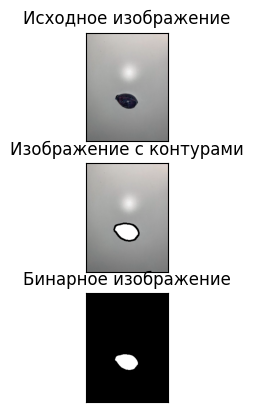

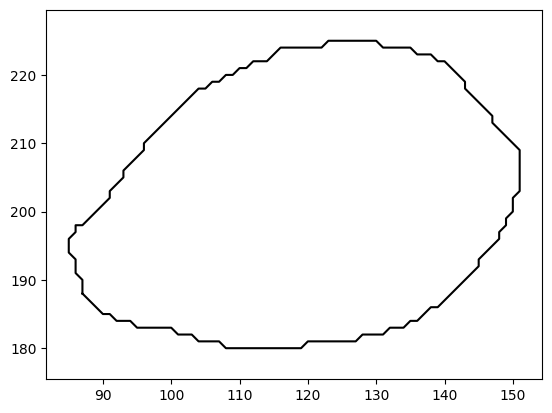

Описание теста -  Проверка отсутствия многоугольника
Ожидаемый результат -  False
Полученный результат -  False


--------------------- Test #2 ---------------------


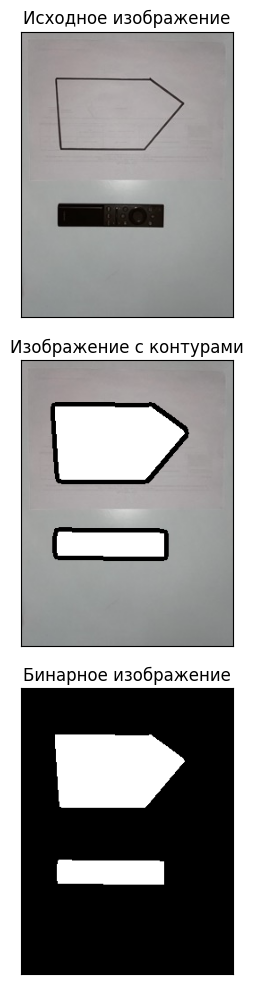

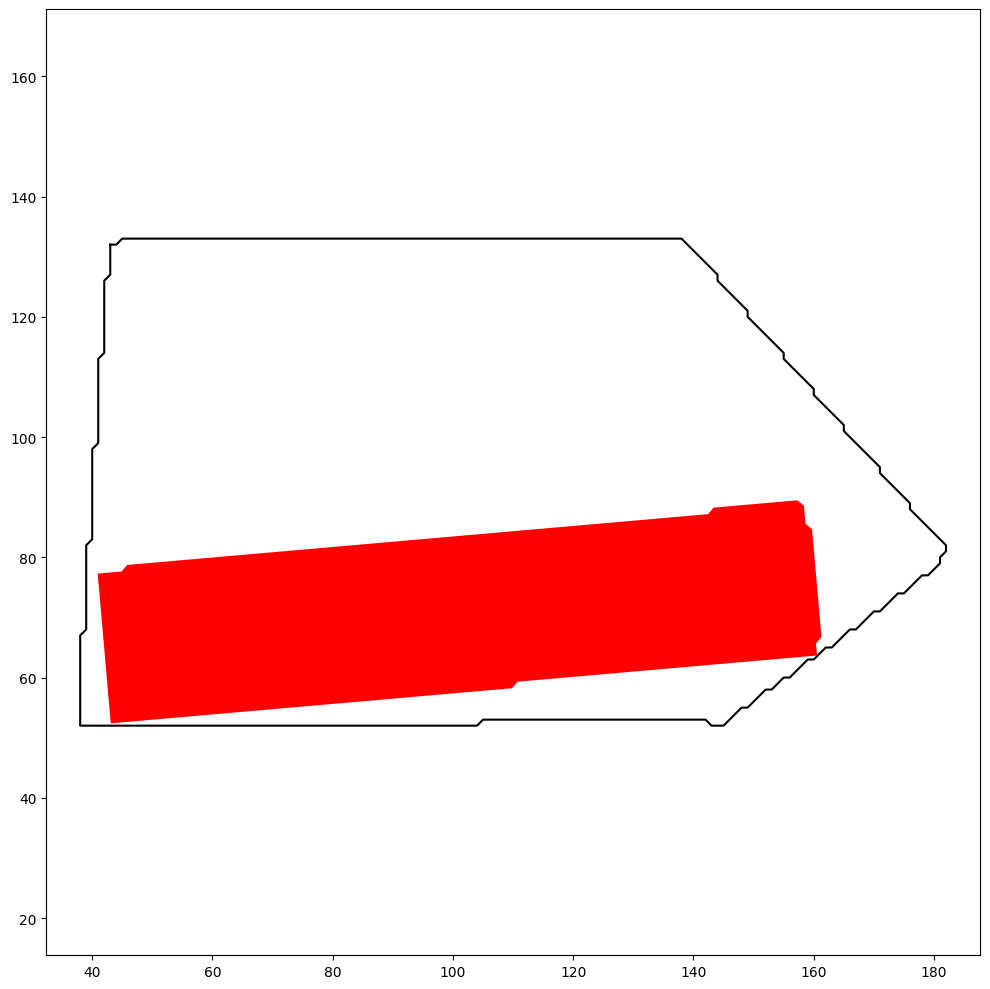

Описание теста -  Проверка что многоугольник вмещает в себя предмет
Ожидаемый результат -  True
Полученный результат -  True


--------------------- Test #3 ---------------------


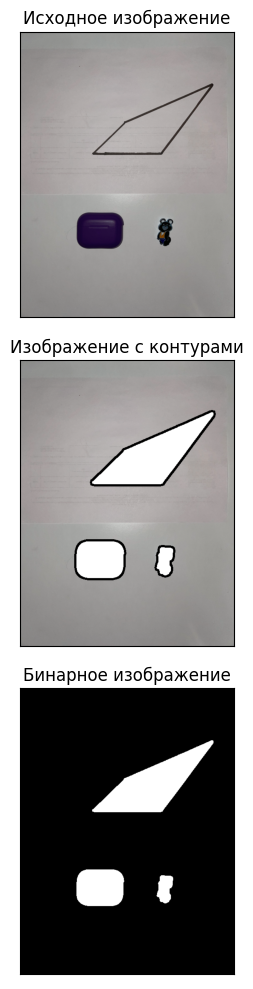

Описание теста -  Проверка что многоугольник вмещает в себя предметы
Ожидаемый результат -  True
Полученный результат -  False


--------------------- Test #4 ---------------------


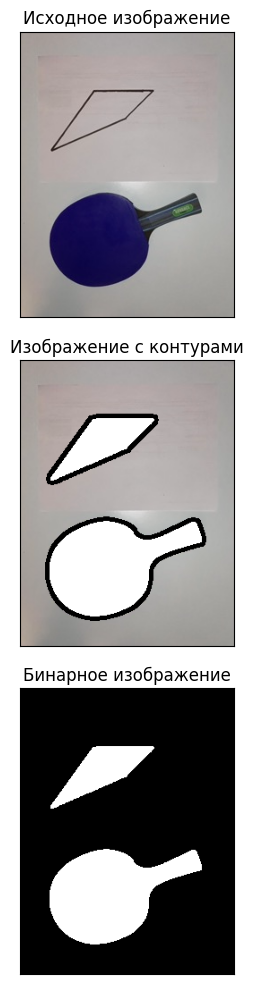

Описание теста -  Проверка на то, что предмет не вмещается
Ожидаемый результат -  False
Полученный результат -  False


--------------------- Test #5 ---------------------


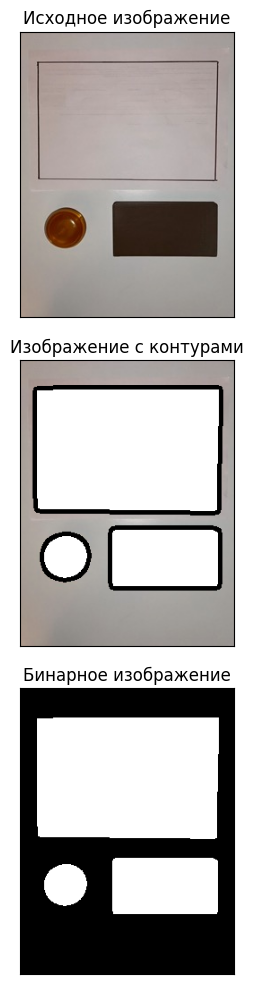

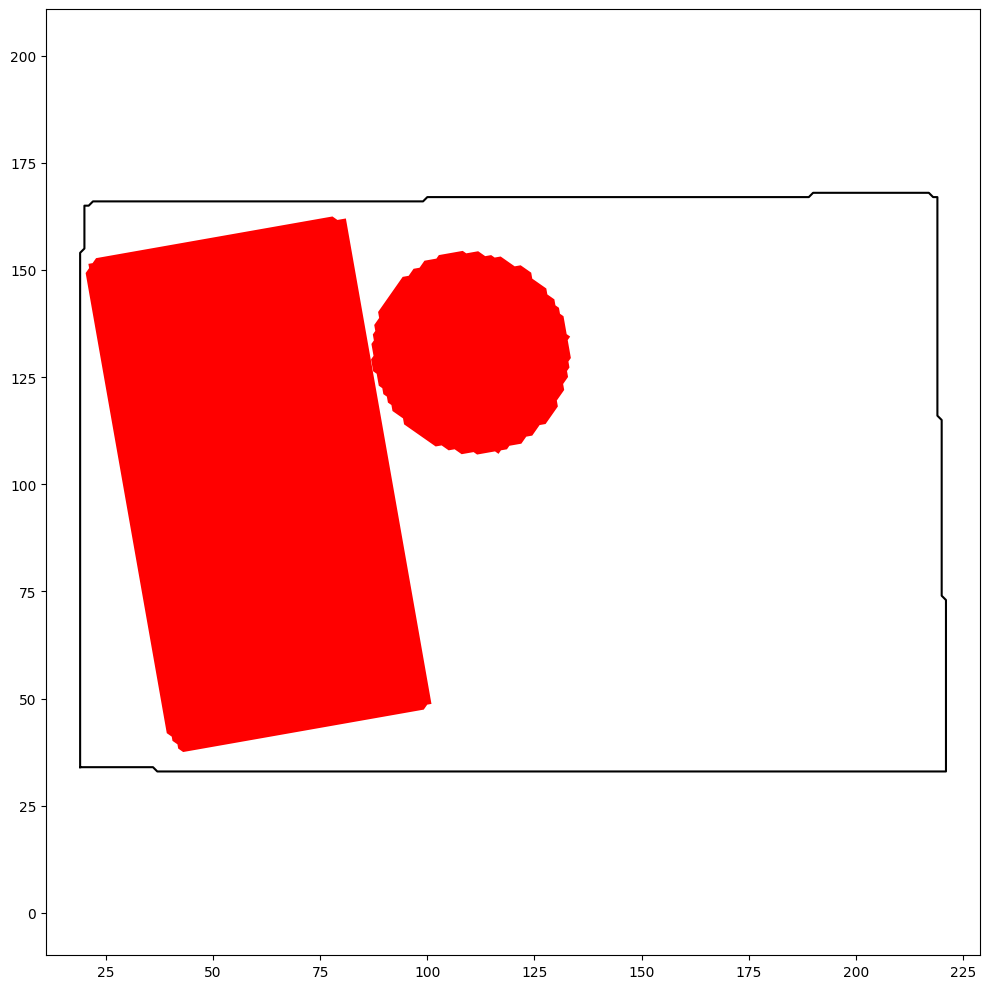

Описание теста -  Проверка двух предметов (каждый помещается по отдельности и вместе)
Ожидаемый результат -  True
Полученный результат -  True


--------------------- Test #6 ---------------------


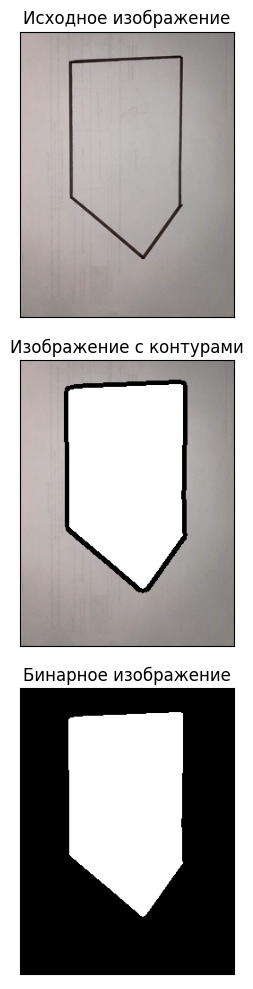

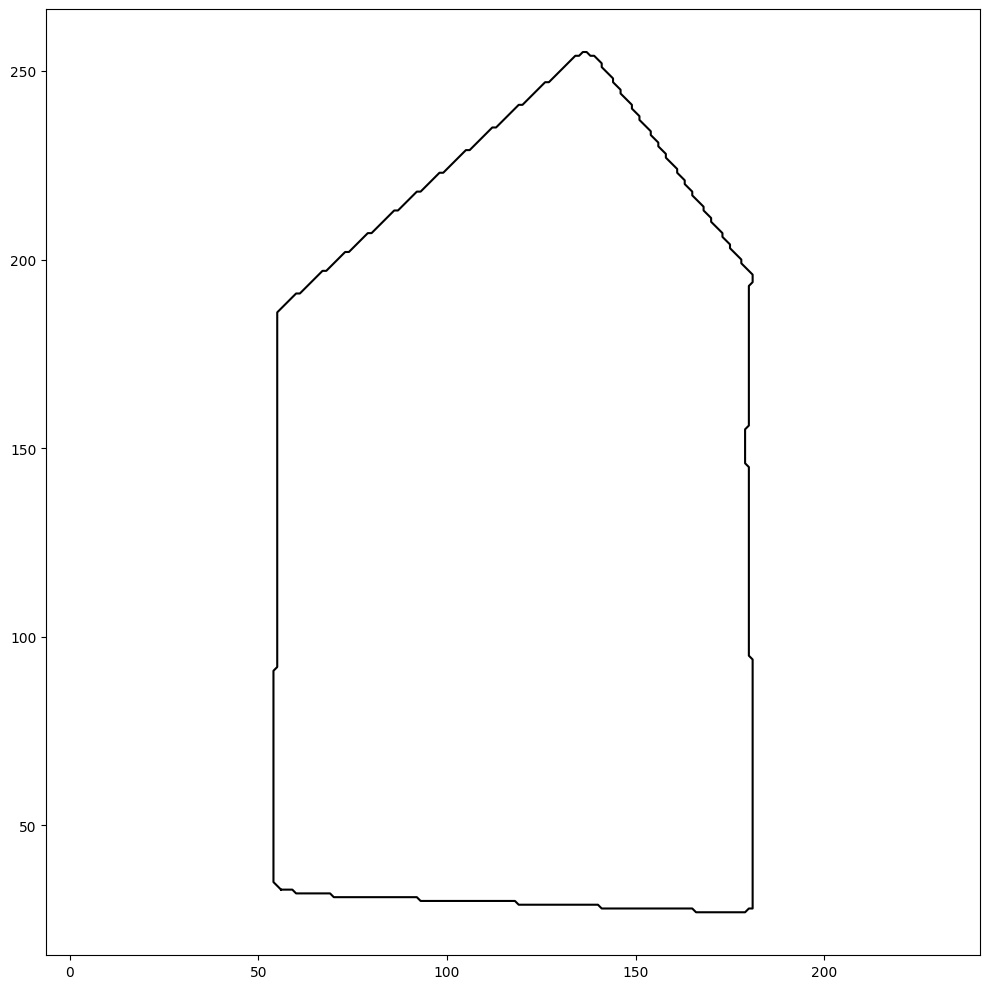

Описание теста -  Проверка отсутствия предметов
Ожидаемый результат -  False
Полученный результат -  False


--------------------- Test #7 ---------------------


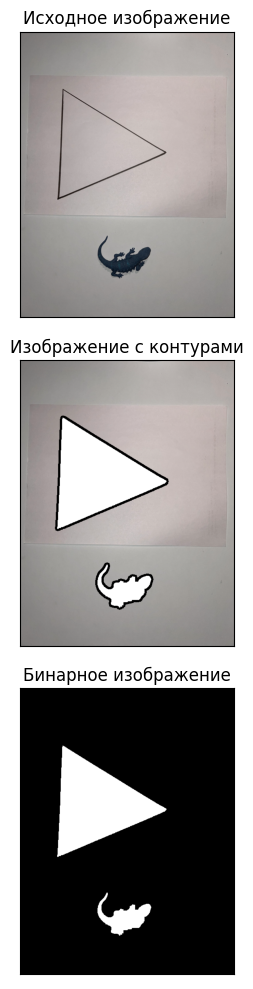

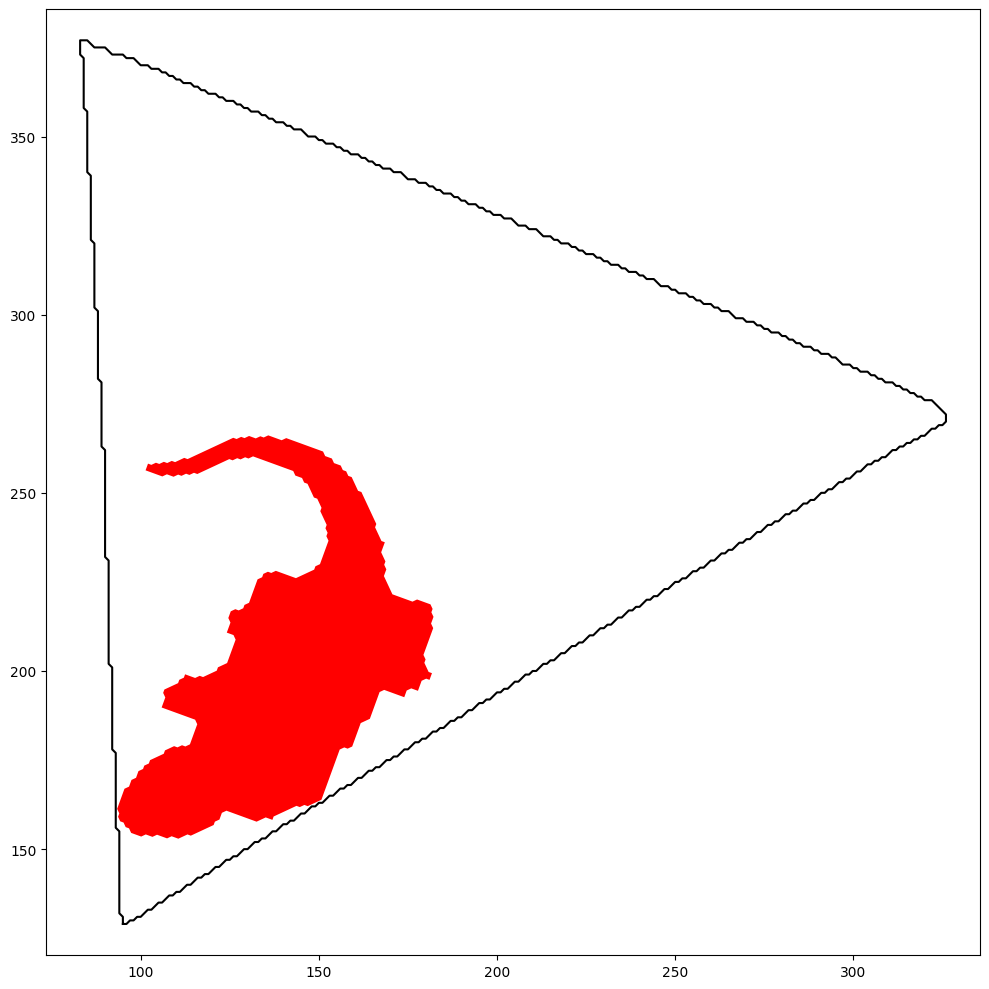

Описание теста -  Проверка что многоугольник вмещает в себя предмет
Ожидаемый результат -  True
Полученный результат -  True


--------------------- Test #8 ---------------------


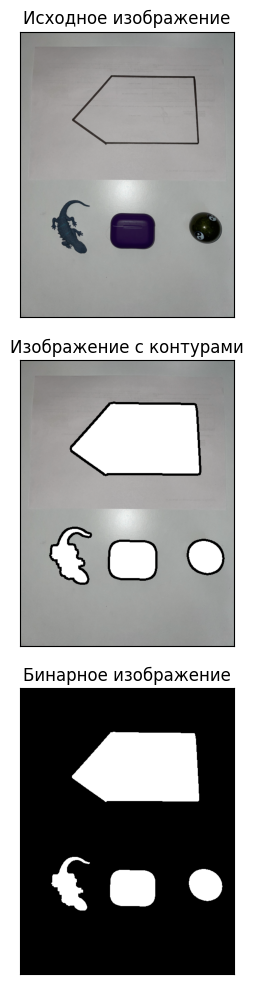

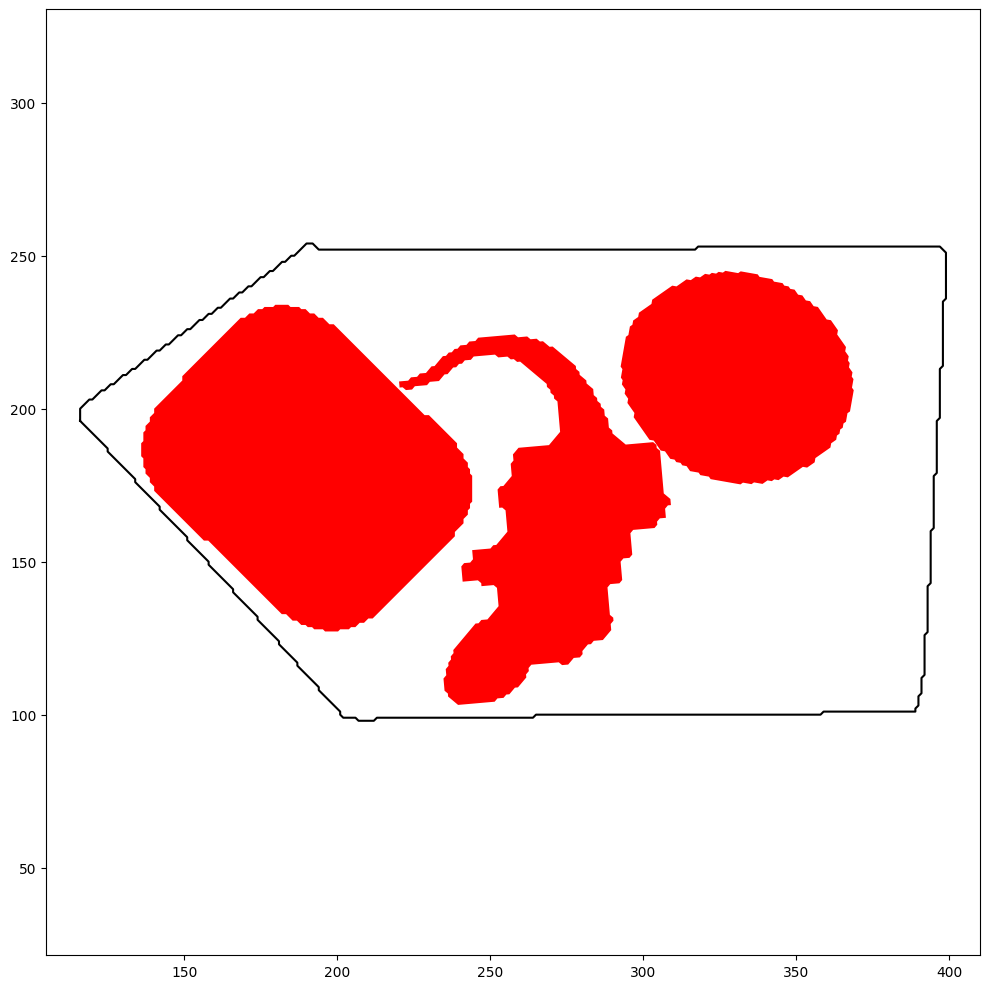

Описание теста -  Проверка на то, что все имеющиеся предметы могут уложиться в многоугольник
Ожидаемый результат -  True
Полученный результат -  True


--------------------- Test #9 ---------------------


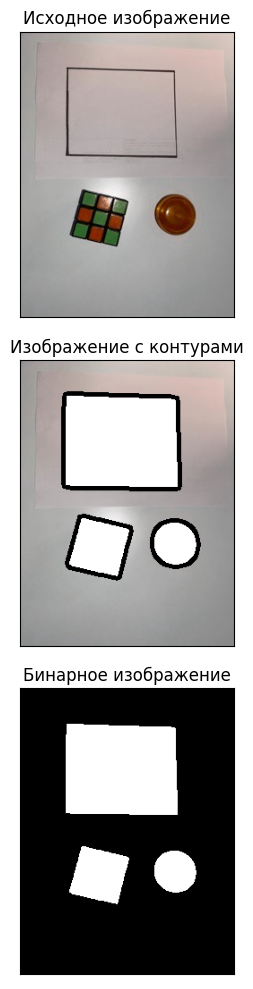

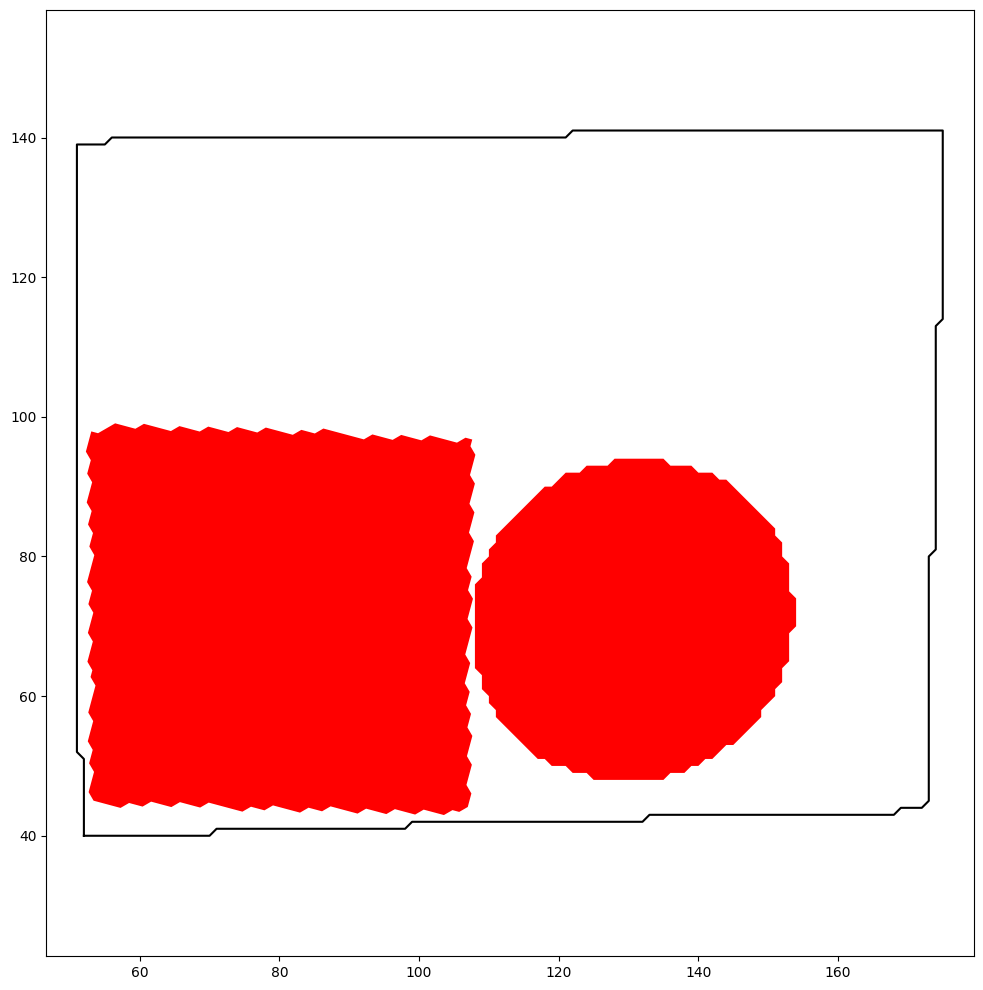

Описание теста -  Проверка что многоугольник вмещает в себя предметы
Ожидаемый результат -  True
Полученный результат -  True


--------------------- Test #10 ---------------------


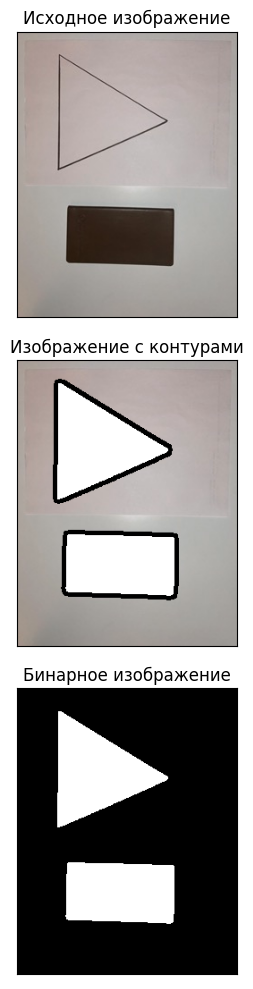

Описание теста -  Проверка что многоугольник не вмещает в себя предмет
Ожидаемый результат -  False
Полученный результат -  False


--------------------- Test #11 ---------------------


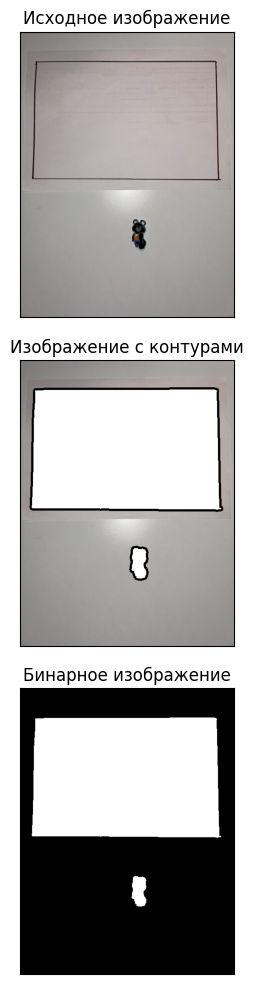

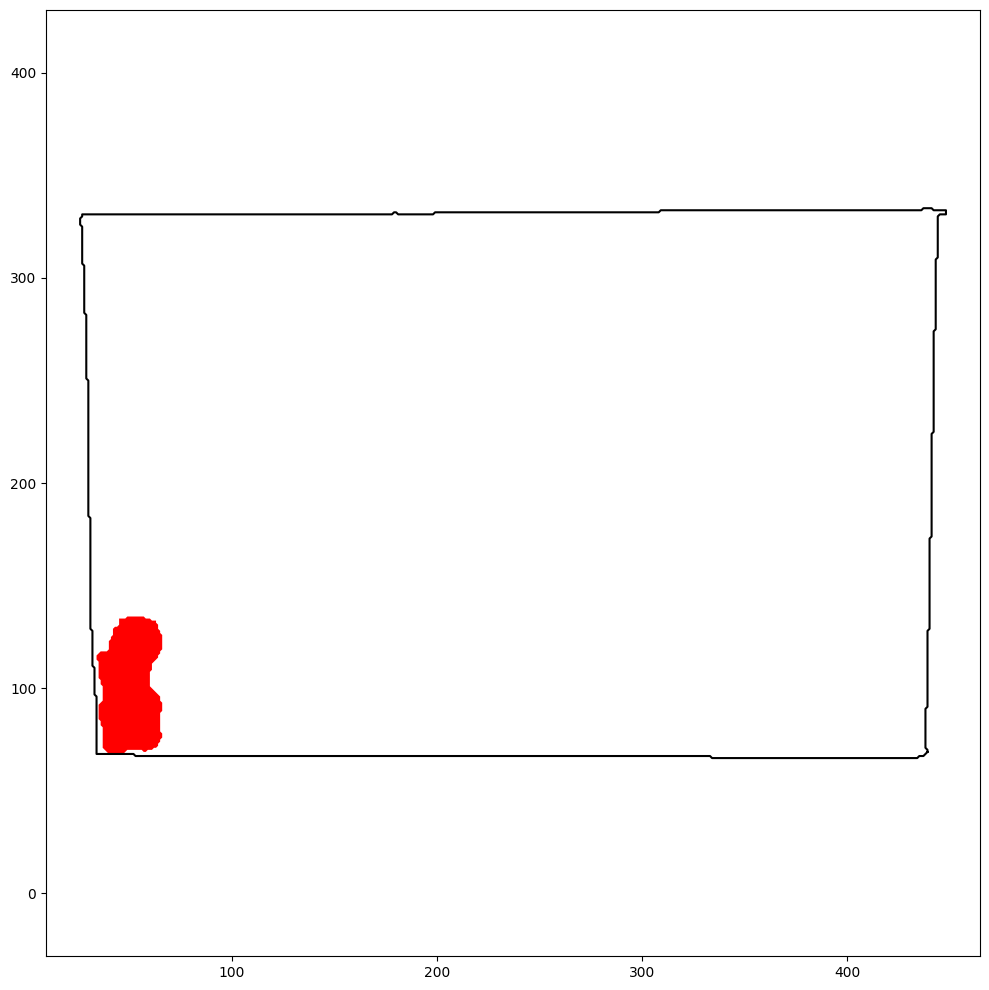

Описание теста -  Проверка на то, что 1 маленький предмет может поместиться в большой многоугольник
Ожидаемый результат -  True
Полученный результат -  True


--------------------- Test #12 ---------------------


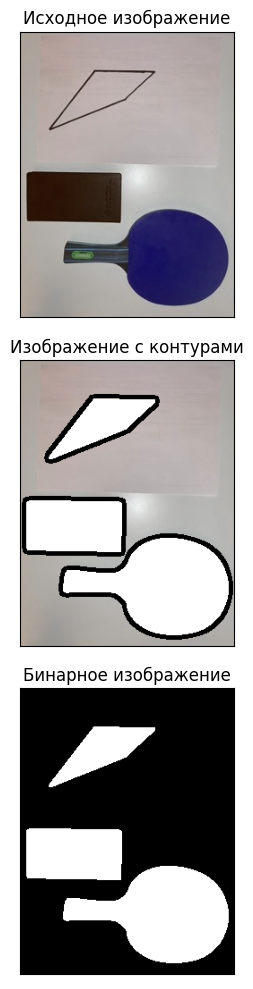

Описание теста -  Проверка двух предметов (оба не помещаются)
Ожидаемый результат -  False
Полученный результат -  False


--------------------- Test #13 ---------------------


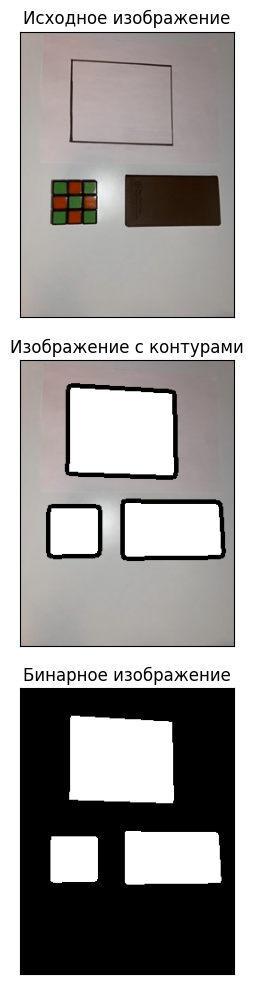

Описание теста -  Проверка двух предметов (каждый помещается по отдельности, но не вместе)
Ожидаемый результат -  False
Полученный результат -  False


--------------------- Test #14 ---------------------


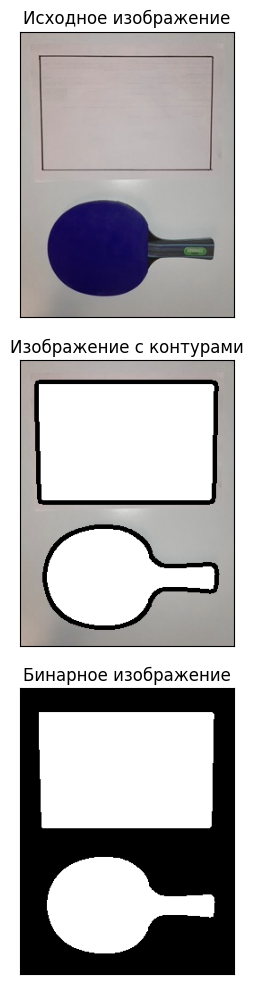

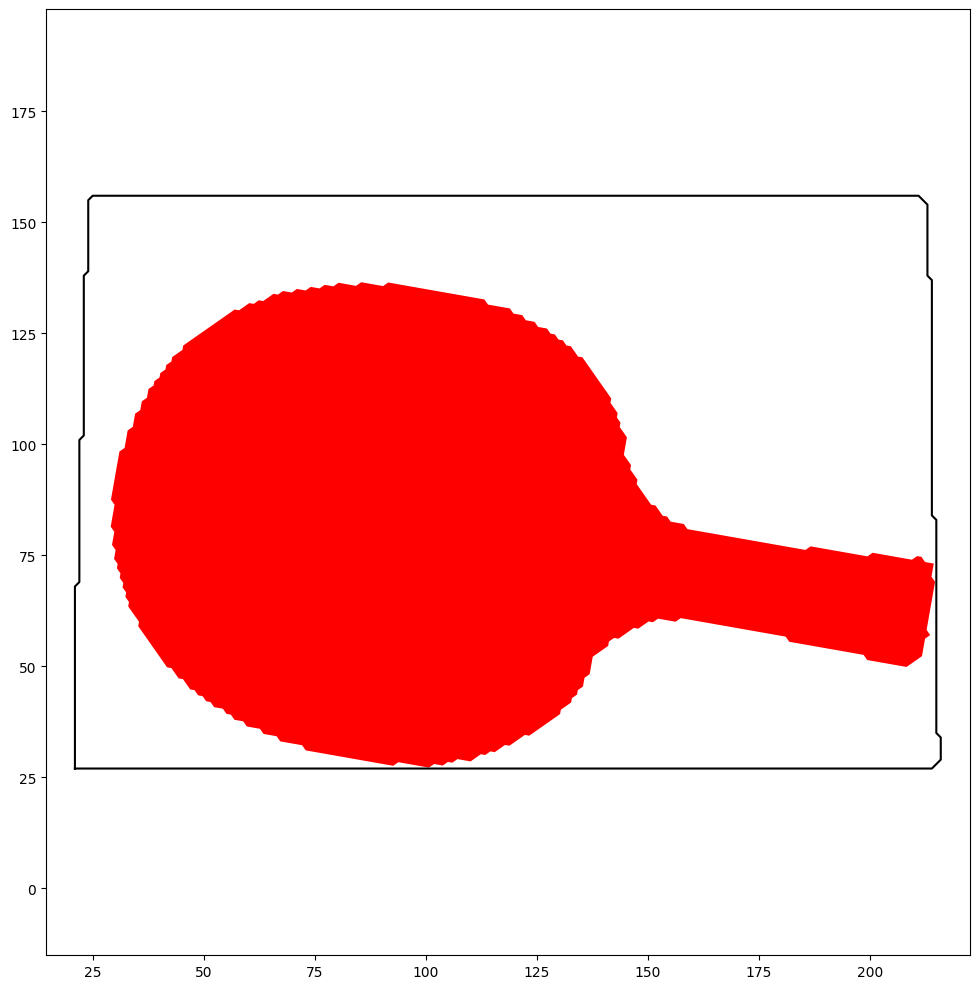

Описание теста -  Проверка на то, что предмет вмещается, но с трудом
Ожидаемый результат -  True
Полученный результат -  True


--------------------- Test #15 ---------------------


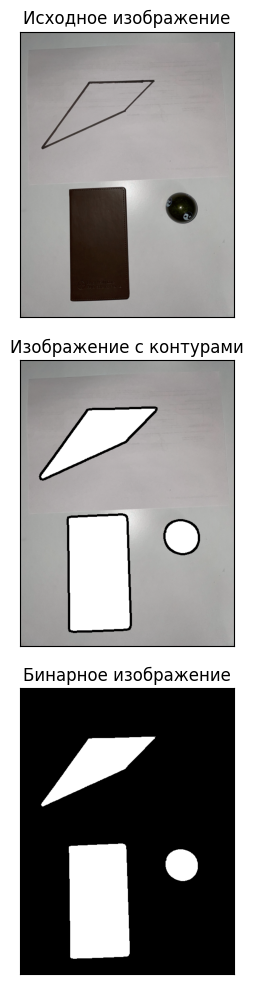

Описание теста -  Проверка двух предметов (один помещается, а другой нет)
Ожидаемый результат -  False
Полученный результат -  False


In [4]:
def demonstration_results(path_tests):
    paths = get_paths(path_tests)
    count = 0
    data = pd.read_csv('data/Tests/dataset.csv', sep=r'\s*;\s*', header=0, engine='python')
    labels = data['result'].tolist()
    descriptions = data['description'].tolist()
    label = [str(label) for label in labels]
    description = [text for text in descriptions]
    results = []
    waited_results = []
    for p in paths:
        print('\n')
        print("--------------------- Test #" + str(count + 1) + " ---------------------")
        result = run(str(p))
        for i in range(len(data)):
            if data.loc[i]['image']== str(p).replace('data/Tests/','') :
                print("Описание теста - ", description[i])
                print("Ожидаемый результат - ", label[i])
                waited_results.append(label[i])
        print("Полученный результат - ", result)
        results.append(result)
        count = count + 1
    return results, waited_results


path_tests = Path("data/Tests")

results, labels = demonstration_results(path_tests)

## Точность алгоритма


Рассчитаем точность алгоритма как отношение количества правильных прогнозов к их общему количеству:

In [5]:
results_ = [str(result) for result in results]    

result = 0 

for i in range(len(results)):
    if str(results_[i]).casefold() == labels[i].casefold():
        result = result + 1
        
accuracy = result / len(labels)

Получили точность:

In [6]:
accuracy

0.9333333333333333

# Промежуточные итоги работы алгоритма

Таким образом, **была достигнута точность в 93.3%** на тестах.  